In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

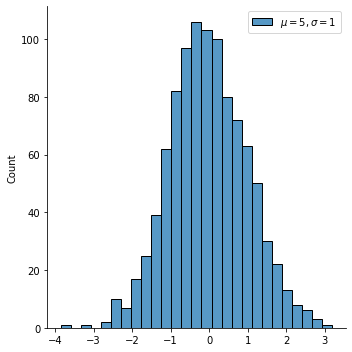

In [2]:
loc = 5 #kg
scale = 1 #kg
N = 1000
population = np.random.normal(loc-loc,scale=scale,size=N)
sns.displot(data=population,label=r"$\mu=5,\sigma=1$")
plt.legend()

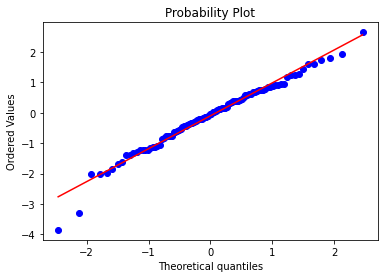

In [3]:
population0 = np.random.choice(population,size=100)
stats.probplot(population0,dist="norm",plot=plt)
plt.show()

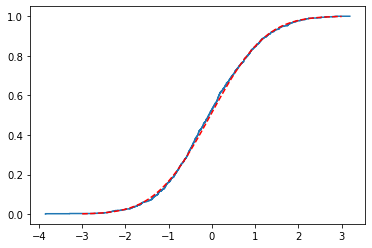

In [4]:
ecdf=sm.distributions.ECDF(population)
plt.step(ecdf.x, ecdf.y)
m, s = stats.norm.fit(population)
x = np.linspace(-3, 3, 100)
t = stats.norm.cdf(x, loc=m, scale=s)
plt.plot(x, t, "r--")

In [5]:
stats.shapiro(population0)

ShapiroResult(statistic=0.9805283546447754, pvalue=0.1461159586906433)

In [6]:
def t_Student(dane, mu_0):
    X  = np.mean(dane)
    s = np.std(dane,ddof=1)
    n=len(dane)
    return ((X-mu_0)/s)*np.sqrt(n)

n=1000
t_tab = []
t_tab2 = []
for i in range(n):
    tab1=np.random.choice(population,size=30)
    t_tab.append(t_Student(tab1,5))
    t_tab2.append(t_Student(tab1,12))
    
sns.displot(t_tab)
sns.displot(t_tab2)
    

In [8]:
tab3 = np.random.choice(population,size=30)
stats.ttest_1samp(tab3,5)

Ttest_1sampResult(statistic=-30.862279586283908, pvalue=9.898583488488799e-24)

# Zadanie 2

In [9]:
dane2 = pd.read_excel("Wynik_EKG.xlsx")
dane2

,Age,Sex,Height (cm),Weight (kg),QRS duration (ms),P-R interval (ms),Q-T interval (ms),T interval (sec),P interval (ms),Angle QRS (au),...,EKG-V6_2,EKG-V6_3,EKG-V6_4,EKG-V6_5,EKG-V6_6,EKG-V6_7,EKG-V6_8,EKG-V6_9,EKG-V6_10,Klasa
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


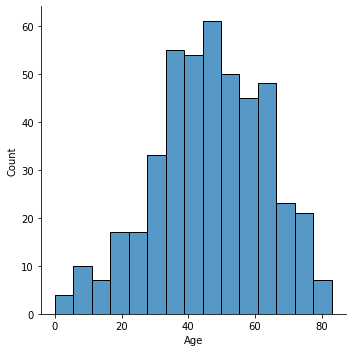

In [44]:
sns.displot(dane2["Age"])

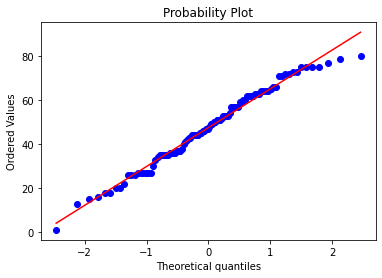

In [45]:
k_age = np.random.choice(dane2["Age"],size=100)
stats.probplot(k_age,dist="norm",plot=plt)
plt.show()

In [58]:
stats.shapiro(k_age)

ShapiroResult(statistic=0.981917142868042, pvalue=0.18697726726531982)

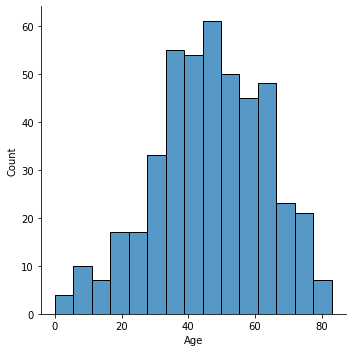

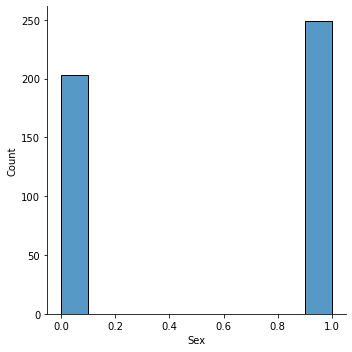

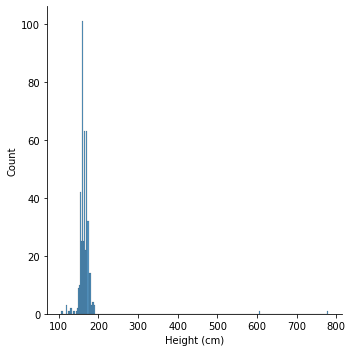

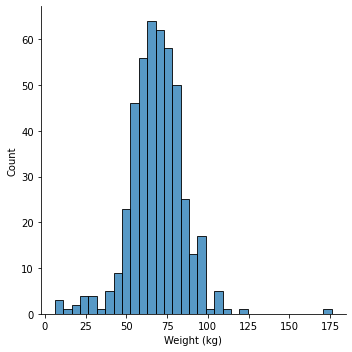

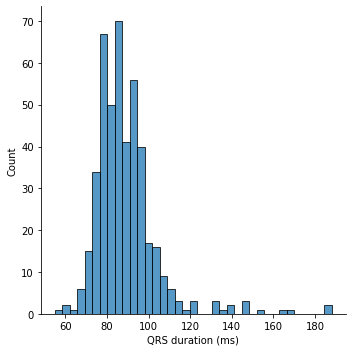

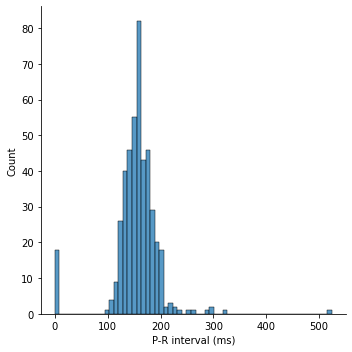

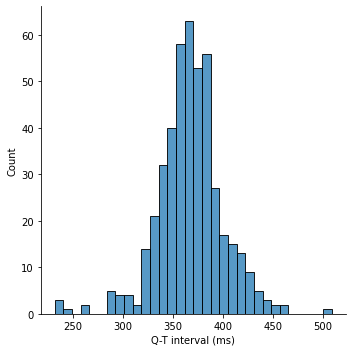

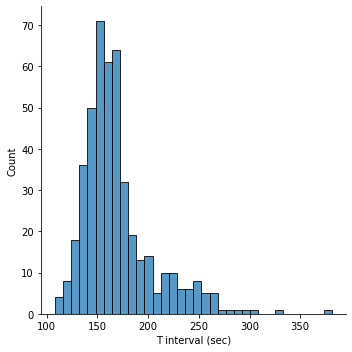

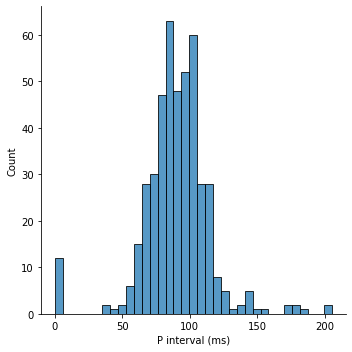

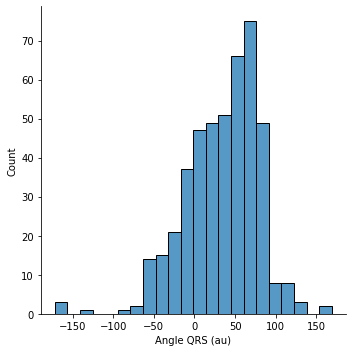

In [52]:
sns.displot(dane2["Age"])
sns.displot(dane2["Sex"])
sns.displot(dane2["Height (cm)"])
sns.displot(dane2["Weight (kg)"])
sns.displot(dane2["QRS duration (ms)"])
sns.displot(dane2["P-R interval (ms)"])
sns.displot(dane2["Q-T interval (ms)"])
sns.displot(dane2["T interval (sec)"])
sns.displot(dane2["P interval (ms)"])
sns.displot(dane2["Angle QRS (au)"])
plt.show()

In [56]:
interval = stats.t.interval(alpha=0.95,df=len(dane2["Age"])-1, loc=np.mean(dane2["Age"]),scale=stats.sem(dane2["Age"]))
interval

(44.94911267782766, 47.99336519827854)

In [66]:
k1 = np.random.choice(dane2["Sex"],size=10)
print(stats.shapiro(k1))
k2 = np.random.choice(dane2["Height (cm)"],size=10)
print(stats.shapiro(k2))
k3 = np.random.choice(dane2["Weight (kg)"],size=10)
print(stats.shapiro(k3))
k4 = np.random.choice(dane2["QRS duration (ms)"],size=10)
print(stats.shapiro(k4))
k5 = np.random.choice(dane2["P-R interval (ms)"],size=10)
print(stats.shapiro(k5))
k6 = np.random.choice(dane2["Q-T interval (ms)"],size=10)
print(stats.shapiro(k6))
k7 = np.random.choice(dane2["T interval (sec)"],size=10)
print(stats.shapiro(k7))
k8 = np.random.choice(dane2["P interval (ms)"],size=10)
print(stats.shapiro(k8))



ShapiroResult(statistic=0.6404852867126465, pvalue=0.00016867939848452806)
ShapiroResult(statistic=0.8459391593933105, pvalue=0.051963843405246735)
ShapiroResult(statistic=0.7761883735656738, pvalue=0.007439339067786932)
ShapiroResult(statistic=0.8280022740364075, pvalue=0.03165660426020622)
ShapiroResult(statistic=0.905916154384613, pvalue=0.25410041213035583)
ShapiroResult(statistic=0.9296639561653137, pvalue=0.4445951282978058)
ShapiroResult(statistic=0.7087562084197998, pvalue=0.001124842674471438)
ShapiroResult(statistic=0.9346558451652527, pvalue=0.49521347880363464)


# Zadanie 3

In [73]:
tab=np.random.normal(loc=10,scale=3,size=1000)
probka1=np.random.choice(tab,size=30)
probka2=np.random.choice(tab,size=30)
stats.ttest_ind(probka1,probka2)

Ttest_indResult(statistic=-0.1734150334022135, pvalue=0.8629290183829007)